In [62]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
import warnings
warnings.filterwarnings('ignore')


In [63]:
#load data

df=pd.read_csv("C:\\Users\\anirb\\Downloads\\test_Y3wMUE5_7gLdaTN.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [65]:
df['Credit_History'].value_counts()

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64

In [66]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

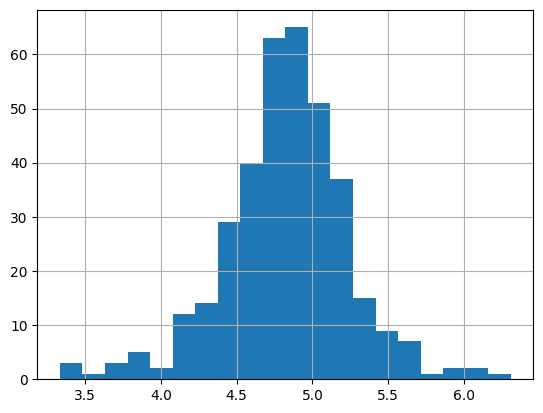

In [67]:
df['Loan_Amount_log']=np.log(df['LoanAmount'])
df['Loan_Amount_log'].hist(bins=20)

<Axes: >

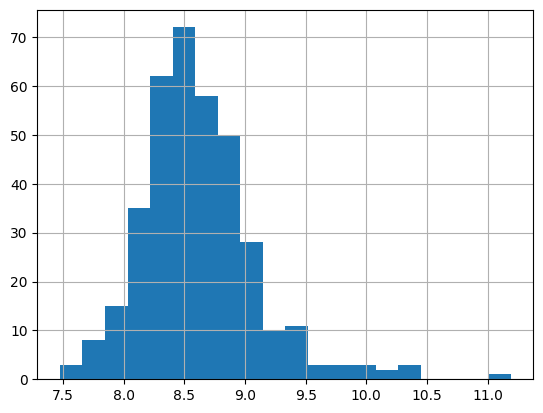

In [68]:
df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['total_income_log']=np.log(df['total_income'])
df['total_income_log'].hist(bins=20)

In [69]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Amount_log       5
total_income          0
total_income_log      0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Amount_log    362 non-null    float64
 13  total_income       367 non-null    int64  
 14  total_income_log   367 non-null    float64
dtypes: float64(5), int64(3), object(7)
memory usage: 43.1+ KB


In [71]:
#data cleaning 
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())                         #in case of mean() no inplace and index are required
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())                         #in case of mean() no inplace and index are required
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)                         #in case of mean() no inplace and index are required
df['Loan_Amount_log']=df['Loan_Amount_log'].fillna(df['Loan_Amount_log'].mean())                         #in case of mean() no inplace and index are required
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Amount_log      0
total_income         0
total_income_log     0
dtype: int64

In [72]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_log,total_income,total_income_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [73]:
df['Credit_History'].value_counts()

Credit_History
1.0    308
0.0     59
Name: count, dtype: int64

In [74]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,10].values

print(x)
print(y)

[['Male' 'Yes' '0' ... 1.0 5720 8.651724084373843]
 ['Male' 'Yes' '1' ... 1.0 4576 8.428580533059634]
 ['Male' 'Yes' '2' ... 1.0 6800 8.824677891164198]
 ...
 ['Male' 'No' '0' ... 1.0 5243 8.564649132572534]
 ['Male' 'Yes' '0' ... 1.0 7393 8.9082888855571]
 ['Male' 'No' '0' ... 1.0 9200 9.126958763037132]]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1

In [75]:
print("per of missing gender is %2f%%" %((df['Gender'].isnull().mean())))

per of missing gender is 0.000000%


number of people who take loan as groupby gender:
Gender
Male      297
Female     70
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

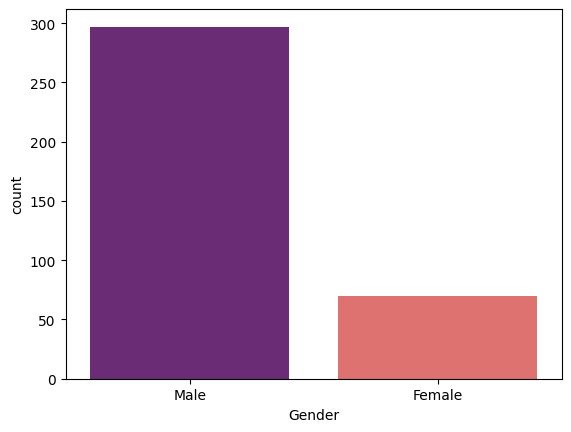

In [76]:
print("number of people who take loan as groupby gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='magma')


number of people who take loan as groupby marital status:
Married
Yes    233
No     134
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

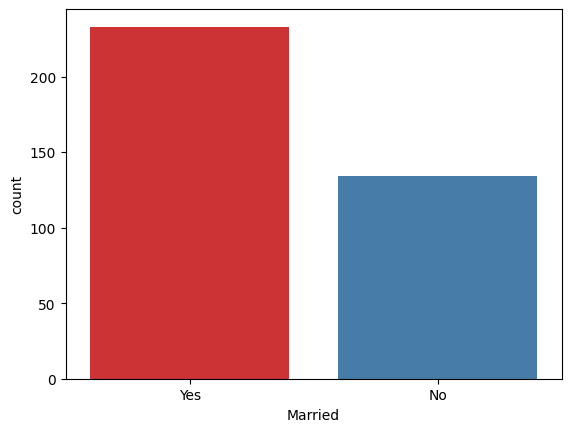

In [77]:
print("number of people who take loan as groupby marital status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

number of people who take loan as groupby dependent:
Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

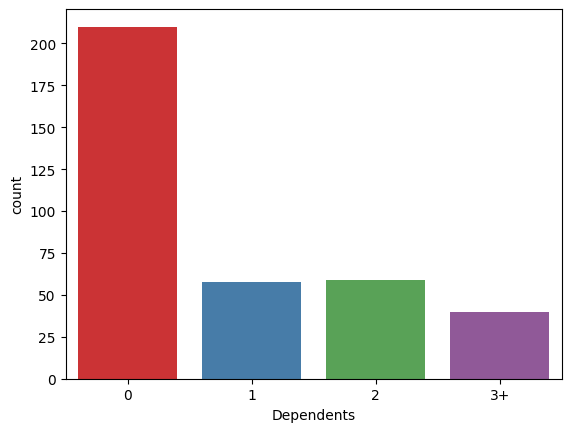

In [78]:
print("number of people who take loan as groupby dependent:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

number of people who take loan as groupby self employ:
Self_Employed
No     330
Yes     37
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

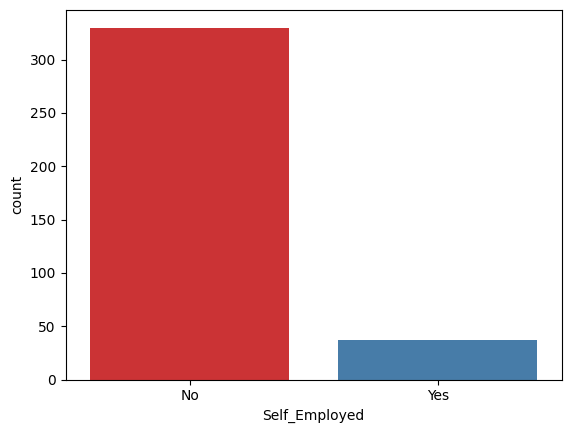

In [79]:
print("number of people who take loan as groupby self employ:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

number of people who take loan as groupby LoanAmount:
LoanAmount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
225.0     1
71.0      1
213.0     1
157.0     1
98.0      1
Name: count, Length: 145, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

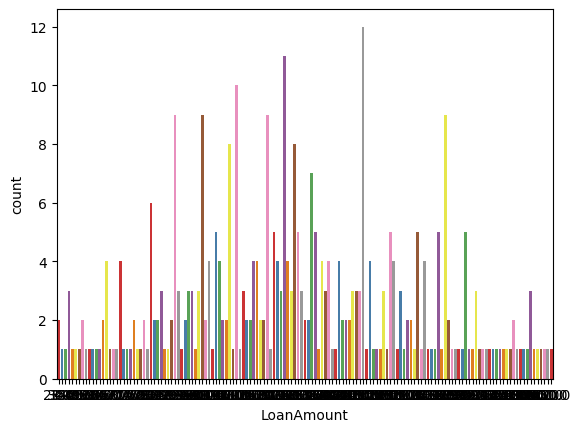

In [80]:
print("number of people who take loan as groupby LoanAmount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

number of people who take loan as groupby Credit_History:
Credit_History
1.0    308
0.0     59
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

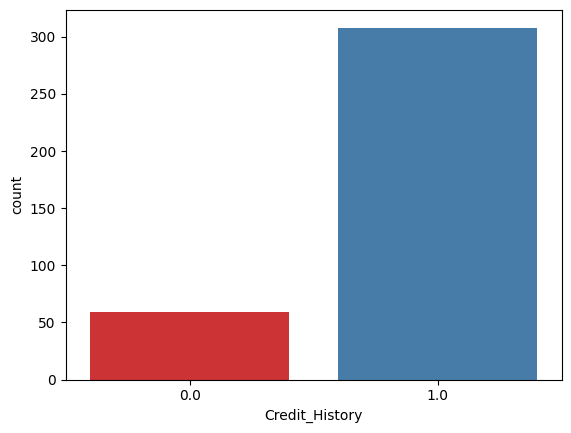

In [81]:
print("number of people who take loan as groupby Credit_History:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [82]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_log,total_income,total_income_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388,5786,8.663196
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932,4867,8.490233
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282,5243,8.564649
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595,7393,8.908289


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

x_train

array([['Male', 'Yes', '2', ..., 1.0, 10890, 9.295600215927006],
       ['Male', 'No', '0', ..., 0.0, 2964, 7.994294986415977],
       ['Male', 'No', '0', ..., 1.0, 6667, 8.80492526261806],
       ...,
       ['Male', 'Yes', '2', ..., 0.0, 3881, 8.263848131368906],
       ['Male', 'Yes', '1', ..., 1.0, 5886, 8.680331928793418],
       ['Male', 'Yes', '1', ..., 1.0, 3218, 8.076515327552329]],
      dtype=object)

In [84]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x=LabelEncoder()
for i in range(0,5):
    x_train[:,i]=LabelEncoder_x.fit_transform(x_train[:,i])
    x_train[:,7]=LabelEncoder_x.fit_transform(x_train[:,7])
x_train

array([[1, 1, 2, ..., 1.0, 10890, 260],
       [1, 0, 0, ..., 0.0, 2964, 16],
       [1, 0, 0, ..., 1.0, 6667, 201],
       ...,
       [1, 1, 2, ..., 0.0, 3881, 55],
       [1, 1, 1, ..., 1.0, 5886, 177],
       [1, 1, 1, ..., 1.0, 3218, 25]], dtype=object)

In [85]:
LabelEncoder_y=LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)
y_train

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [86]:
for i in range(0,5):
    x_test[:,i]=LabelEncoder_x.fit_transform(x_test[:,i])
    x_test[:,7]=LabelEncoder_x.fit_transform(x_test[:,7])
x_test

array([[1, 1, 1, 0, 2, 1.0, 4860, 31],
       [1, 0, 1, 1, 2, 1.0, 6065, 46],
       [1, 1, 2, 0, 2, 1.0, 11841, 66],
       [1, 1, 0, 0, 2, 1.0, 17142, 70],
       [1, 1, 0, 0, 2, 1.0, 6732, 52],
       [0, 0, 0, 0, 2, 0.0, 3500, 10],
       [0, 1, 0, 0, 2, 1.0, 3945, 17],
       [1, 1, 1, 0, 2, 1.0, 12333, 68],
       [1, 0, 0, 1, 2, 1.0, 4800, 30],
       [1, 1, 2, 0, 2, 1.0, 5613, 42],
       [1, 1, 1, 0, 2, 1.0, 7245, 54],
       [0, 0, 1, 0, 1, 1.0, 5062, 37],
       [0, 0, 0, 1, 2, 1.0, 4402, 26],
       [1, 0, 0, 0, 2, 1.0, 5821, 45],
       [0, 1, 0, 0, 0, 1.0, 8738, 61],
       [1, 0, 0, 0, 2, 0.0, 6500, 49],
       [1, 1, 0, 0, 2, 1.0, 4258, 22],
       [1, 0, 0, 0, 2, 1.0, 6887, 53],
       [1, 1, 2, 0, 2, 1.0, 4358, 25],
       [1, 1, 1, 0, 2, 1.0, 3901, 16],
       [0, 1, 0, 0, 2, 0.0, 4241, 21],
       [1, 1, 2, 1, 2, 1.0, 3623, 13],
       [1, 1, 3, 1, 2, 1.0, 5786, 44],
       [1, 1, 2, 0, 2, 1.0, 4886, 32],
       [0, 0, 0, 1, 2, 1.0, 2107, 0],
       [1, 1, 1, 1, 2, 

In [87]:
y_test=LabelEncoder_y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [88]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [89]:
x_train

array([[ 0.46450795,  0.71435935,  1.12451492, ...,  0.42036511,
         0.79483467,  1.48469823],
       [ 0.46450795, -1.39985569, -0.75288036, ..., -2.37888438,
        -0.62855392, -1.5459972 ],
       [ 0.46450795, -1.39985569, -0.75288036, ...,  0.42036511,
         0.03644835,  0.75186614],
       ...,
       [ 0.46450795,  0.71435935,  1.12451492, ..., -2.37888438,
        -0.46387472, -1.06158276],
       [ 0.46450795,  0.71435935,  0.18581728, ...,  0.42036511,
        -0.10380733,  0.45376495],
       [ 0.46450795,  0.71435935,  0.18581728, ...,  0.42036511,
        -0.5829394 , -1.43420925]])

In [90]:
x_test

array([[ 0.56694671,  0.94733093,  0.16616217, -0.62946518,  0.24724902,
         0.50421948, -0.35427873, -0.20636216],
       [ 0.56694671, -1.05559733,  0.16616217,  1.58865022,  0.24724902,
         0.50421948,  0.01269191,  0.51395858],
       [ 0.56694671,  0.94733093,  1.11200839, -0.62946518,  0.24724902,
         0.50421948,  1.77171465,  1.47438623],
       [ 0.56694671,  0.94733093, -0.77968404, -0.62946518,  0.24724902,
         0.50421948,  3.38608092,  1.66647176],
       [ 0.56694671,  0.94733093, -0.77968404, -0.62946518,  0.24724902,
         0.50421948,  0.21582005,  0.80208688],
       [-1.76383421, -1.05559733, -0.77968404, -0.62946518,  0.24724902,
        -1.9832633 , -0.76845306, -1.21481119],
       [-1.76383421,  0.94733093, -0.77968404, -0.62946518,  0.24724902,
         0.50421948, -0.63293278, -0.87866151],
       [ 0.56694671,  0.94733093,  0.16616217, -0.62946518,  0.24724902,
         0.50421948,  1.9215483 ,  1.570429  ],
       [ 0.56694671, -1.05559733

In [91]:
from sklearn.ensemble import RandomForestClassifier
model_1=RandomForestClassifier()
model_1.fit(x_train,y_train)


RandomForestClassifier()

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=model_1.predict(x_test)
print("accuracy of this model is:",accuracy_score(y_test,y_pred))

accuracy of this model is: 1.0


In [96]:
predicted_value=y_pred
predicted_value

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

<Axes: >

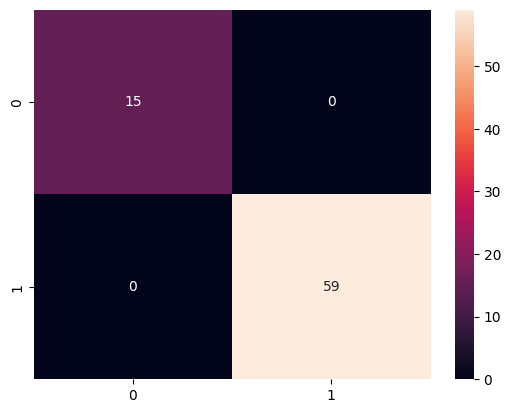

In [97]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,)

In [101]:
if y_pred[0]==0:
    print("loan has not approved")
else:
    print("loan has approved")

loan has approved
